In [1]:
%matplotlib inline
# %run test.caltech.py

frying-pan


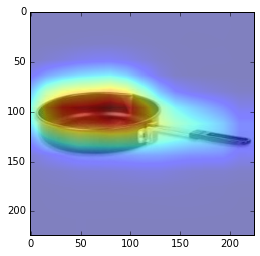

frying-pan


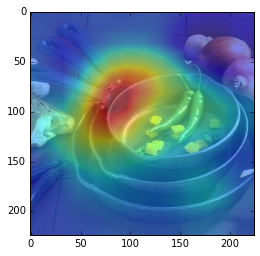

frying-pan


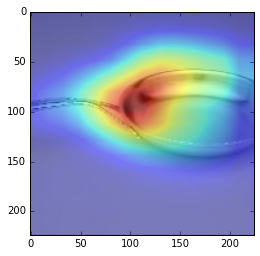

frying-pan


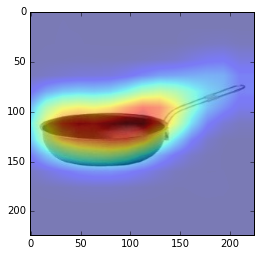

frying-pan


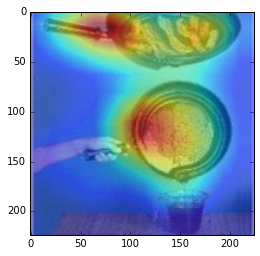

frying-pan


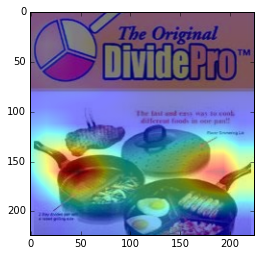

frying-pan


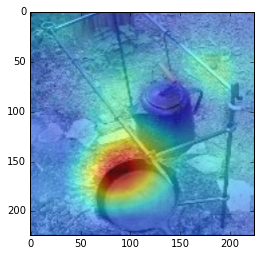

frying-pan


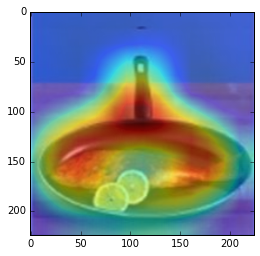

frying-pan


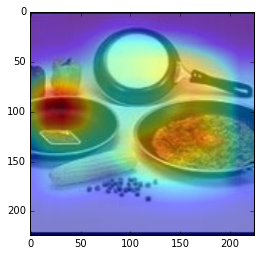

frying-pan


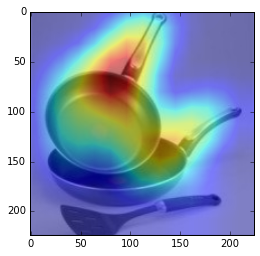

jesus-christ


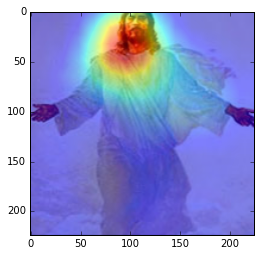

jesus-christ


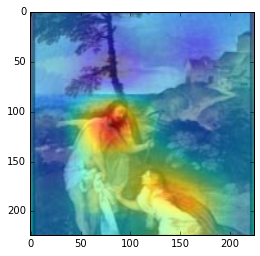

jesus-christ


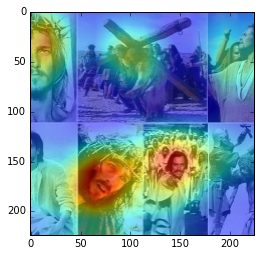

jesus-christ


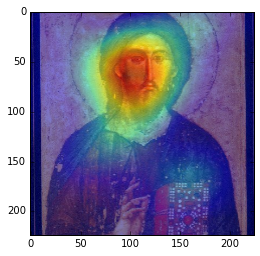

jesus-christ


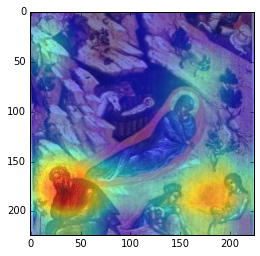

jesus-christ


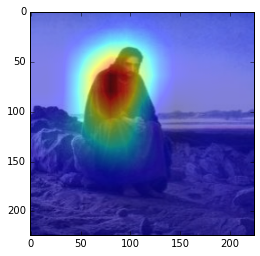

jesus-christ


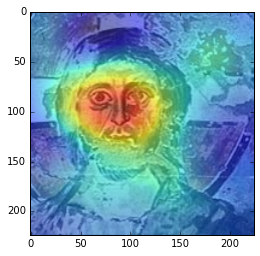

jesus-christ


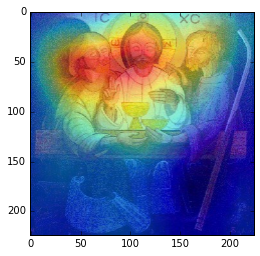

jesus-christ


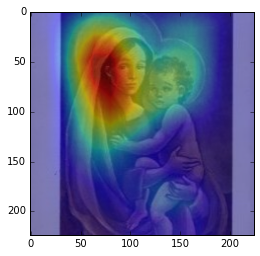

jesus-christ


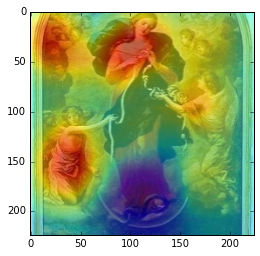

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

from detector import Detector
from util import load_image

import skimage.io
import matplotlib.pyplot as plt

import os
#import ipdb

testset_path = '../data/caltech/test.pickle'
label_dict_path = '../data/caltech/label_dict.pickle'

weight_path = '../data/caffe_layers_value.pickle'
model_path = '../models/caltech256/model-86'

batch_size = 1

testset = pd.read_pickle( testset_path )[::-1][20:40]
label_dict = pd.read_pickle( label_dict_path )
n_labels = len( label_dict )

images_tf = tf.placeholder( tf.float32, [None, 224, 224, 3], name="images")
labels_tf = tf.placeholder( tf.int64, [None], name='labels')

detector = Detector( weight_path, n_labels )
c1,c2,c3,c4,conv5, conv6, gap, output = detector.inference( images_tf )
classmap = detector.get_classmap( labels_tf, conv6 )

sess = tf.InteractiveSession()
saver = tf.train.Saver()

saver.restore( sess, model_path )

for start, end in zip(
    range( 0, len(testset)+batch_size, batch_size),
    range(batch_size, len(testset)+batch_size, batch_size)):

    current_data = testset[start:end]
    current_image_paths = current_data['image_path'].values
    current_images = np.array(map(lambda x: load_image(x), current_image_paths))

    good_index = np.array(map(lambda x: x is not None, current_images))

    current_data = current_data[good_index]
    current_image_paths = current_image_paths[good_index]
    current_images = np.stack(current_images[good_index])
    current_labels = current_data['label'].values
    current_label_names = current_data['label_name'].values

    conv6_val, output_val = sess.run(
            [conv6, output],
            feed_dict={
                images_tf: current_images
                })

    label_predictions = output_val.argmax( axis=1 )
    acc = (label_predictions == current_labels).sum()

    classmap_vals = sess.run(
            classmap,
            feed_dict={
                labels_tf: label_predictions,
                conv6: conv6_val
                })

    classmap_answer = sess.run(
            classmap,
            feed_dict={
                labels_tf: current_labels,
                conv6: conv6_val
                })

    classmap_vis = map(lambda x: ((x-x.min())/(x.max()-x.min())), classmap_answer)

    for vis, ori,ori_path, l_name in zip(classmap_vis, current_images, current_image_paths, current_label_names):
        print l_name
        plt.imshow( ori )
        plt.imshow( vis, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
        plt.show()

#        vis_path = '../results/'+ ori_path.split('/')[-1]
#        vis_path_ori = '../results/'+ori_path.split('/')[-1].split('.')[0]+'.ori.jpg'
#        skimage.io.imsave( vis_path, vis )
#        skimage.io.imsave( vis_path_ori, ori )




floppy-disk


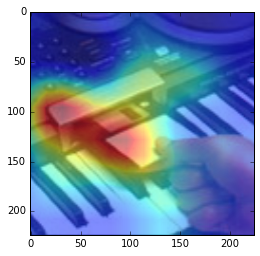

floppy-disk


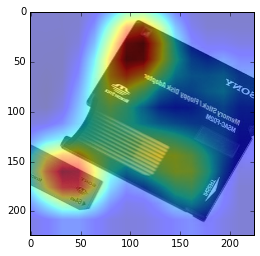

floppy-disk


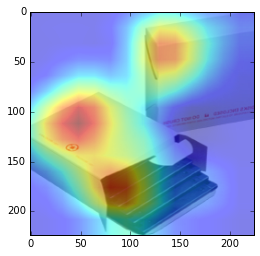

floppy-disk


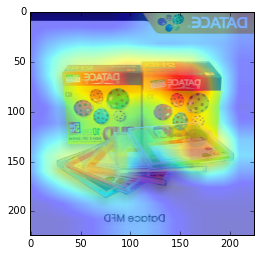

floppy-disk


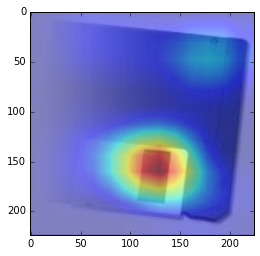

floppy-disk


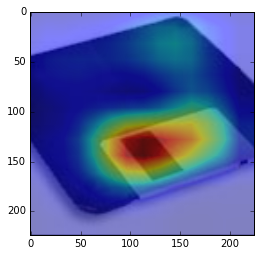

floppy-disk


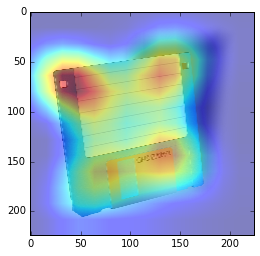

floppy-disk


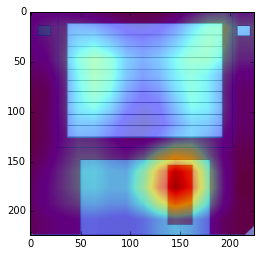

floppy-disk


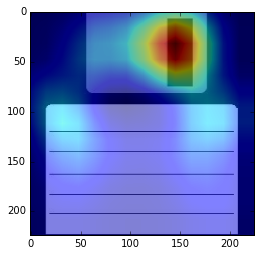

floppy-disk


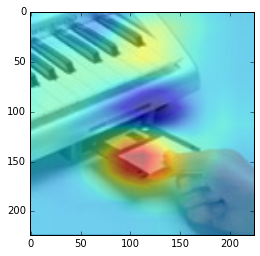

mushroom


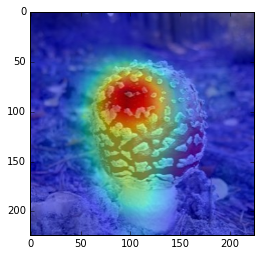

mushroom


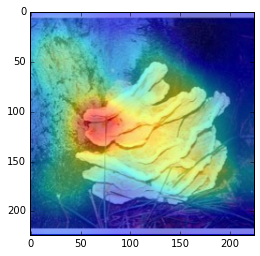

mushroom


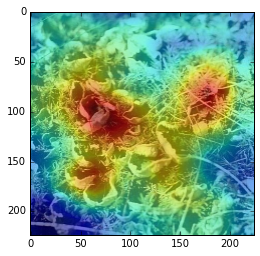

mushroom


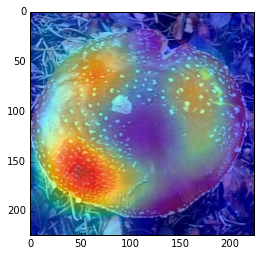

mushroom


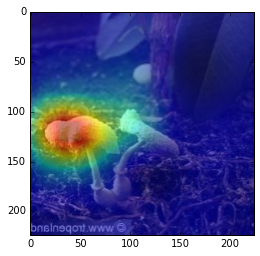

mushroom


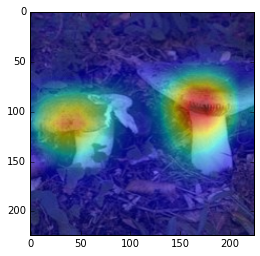

mushroom


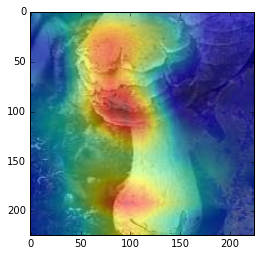

mushroom


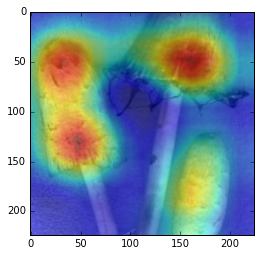

mushroom


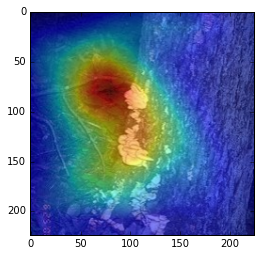

mushroom


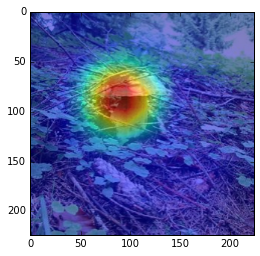

In [3]:
batch_size = 1

testset = pd.read_pickle( testset_path )[::-1][40:60]
label_dict = pd.read_pickle( label_dict_path )
n_labels = len( label_dict )

# images_tf = tf.placeholder( tf.float32, [None, 224, 224, 3], name="images")
# labels_tf = tf.placeholder( tf.int64, [None], name='labels')

# detector = Detector( weight_path, n_labels )
# c1,c2,c3,c4,conv5, conv6, gap, output = detector.inference( images_tf )
# classmap = detector.get_classmap( labels_tf, conv6 )

# sess = tf.InteractiveSession()
# saver = tf.train.Saver()

# saver.restore( sess, model_path )

for start, end in zip(
    range( 0, len(testset)+batch_size, batch_size),
    range(batch_size, len(testset)+batch_size, batch_size)):

    current_data = testset[start:end]
    current_image_paths = current_data['image_path'].values
    current_images = np.array(map(lambda x: load_image(x), current_image_paths))

    good_index = np.array(map(lambda x: x is not None, current_images))

    current_data = current_data[good_index]
    current_image_paths = current_image_paths[good_index]
    current_images = np.stack(current_images[good_index])
    current_labels = current_data['label'].values
    current_label_names = current_data['label_name'].values

    conv6_val, output_val = sess.run(
            [conv6, output],
            feed_dict={
                images_tf: current_images
                })

    label_predictions = output_val.argmax( axis=1 )
    acc = (label_predictions == current_labels).sum()

    classmap_vals = sess.run(
            classmap,
            feed_dict={
                labels_tf: label_predictions,
                conv6: conv6_val
                })

    classmap_answer = sess.run(
            classmap,
            feed_dict={
                labels_tf: current_labels,
                conv6: conv6_val
                })

    classmap_vis = map(lambda x: ((x-x.min())/(x.max()-x.min())), classmap_answer)

    for vis, ori,ori_path, l_name in zip(classmap_vis, current_images, current_image_paths, current_label_names):
        print l_name
        plt.imshow( ori )
        plt.imshow( vis, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
        plt.show()

#        vis_path = '../results/'+ ori_path.split('/')[-1]
#        vis_path_ori = '../results/'+ori_path.split('/')[-1].split('.')[0]+'.ori.jpg'
#        skimage.io.imsave( vis_path, vis )
#        skimage.io.imsave( vis_path_ori, ori )





# Traincode

In [ ]:
# import tensorflow as tf
# import numpy as np
# import pandas as pd

# from detector import Detector
# from util import load_image
# import os
# #import ipdb
# import procname
# procname.setprocname('Junho TF experiemnt')

# weight_path = '../data/caffe_layers_value.pickle'
# model_path = '../models/caltech256/'
# pretrained_model_path = None #'../models/caltech256/model-0'
# n_epochs = 10000
# init_learning_rate = 0.01
# weight_decay_rate = 0.0005
# momentum = 0.9
# batch_size = 50

dataset_path = '/home/junho/data/256_ObjectCategories'  #'/media/pil/DL/data/Caltech256/256_ObjectCategories' # '/media/storage3/Study/data/256_ObjectCategories'

caltech_path = '../data/caltech'
trainset_path = '../data/caltech/train.pickle'
testset_path = '../data/caltech/test.pickle'
label_dict_path = '../data/caltech/label_dict.pickle'




In [ ]:
if not os.path.exists( trainset_path ):
    if not os.path.exists( caltech_path ):
        os.makedirs( caltech_path )
    image_dir_list = os.listdir( dataset_path )

    label_pairs = map(lambda x: x.split('.'), image_dir_list)
    labels, label_names = zip(*label_pairs)
    labels = map(lambda x: int(x), labels)

    label_dict = pd.Series( labels, index=label_names )
    label_dict -= 1
    n_labels = len( label_dict )

    image_paths_per_label = map(lambda one_dir: map(lambda one_file: os.path.join( dataset_path, one_dir, one_file ), os.listdir( os.path.join( dataset_path, one_dir))), image_dir_list)
    image_paths_train = np.hstack(map(lambda one_class: one_class[:-10], image_paths_per_label))
    image_paths_test = np.hstack(map(lambda one_class: one_class[-10:], image_paths_per_label))

    trainset = pd.DataFrame({'image_path': image_paths_train})
    testset  = pd.DataFrame({'image_path': image_paths_test })

    trainset = trainset[ trainset['image_path'].map( lambda x: x.endswith('.jpg'))]
    trainset['label'] = trainset['image_path'].map(lambda x: int(x.split('/')[-2].split('.')[0]) - 1)
    trainset['label_name'] = trainset['image_path'].map(lambda x: x.split('/')[-2].split('.')[1])

    testset = testset[ testset['image_path'].map( lambda x: x.endswith('.jpg'))]
    testset['label'] = testset['image_path'].map(lambda x: int(x.split('/')[-2].split('.')[0]) - 1)
    testset['label_name'] = testset['image_path'].map(lambda x: x.split('/')[-2].split('.')[1])

    label_dict.to_pickle(label_dict_path)
    trainset.to_pickle(trainset_path)
    testset.to_pickle(testset_path)
else:
    trainset = pd.read_pickle( trainset_path )
    testset  = pd.read_pickle( testset_path )
    label_dict = pd.read_pickle( label_dict_path )
    n_labels = len(label_dict)

In [ ]:

learning_rate = tf.placeholder( tf.float32, [])
images_tf = tf.placeholder( tf.float32, [None, 224, 224, 3], name="images")
labels_tf = tf.placeholder( tf.int64, [None], name='labels')

detector = Detector(weight_path, n_labels)

p1,p2,p3,p4,conv5, conv6, gap, output = detector.inference(images_tf)
loss_tf = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits( output, labels_tf ))

weights_only = filter( lambda x: x.name.endswith('W:0'), tf.trainable_variables() )
weight_decay = tf.reduce_sum(tf.pack([tf.nn.l2_loss(x) for x in weights_only])) * weight_decay_rate
loss_tf += weight_decay

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
#sess = tf.Session(config=config)
sess = tf.InteractiveSession(config=config)
saver = tf.train.Saver( max_to_keep=50 )

optimizer = tf.train.MomentumOptimizer( learning_rate, momentum )
grads_and_vars = optimizer.compute_gradients( loss_tf )
grads_and_vars = map(lambda gv: (gv[0], gv[1]) if ('conv6' in gv[1].name or 'GAP' in gv[1].name) else (gv[0]*0.1, gv[1]), grads_and_vars)
#grads_and_vars = [(tf.clip_by_value(gv[0], -5., 5.), gv[1]) for gv in grads_and_vars]
train_op = optimizer.apply_gradients( grads_and_vars )
tf.initialize_all_variables().run()

if pretrained_model_path:
    print "Pretrained"
    saver.restore(sess, pretrained_model_path)

testset.index  = range( len(testset) )
#testset = testset.ix[np.random.permutation( len(testset) )]#[:1000]
#trainset2 = testset[1000:]
#testset = testset[:1000]

#trainset = pd.concat( [trainset, trainset2] )
# We lack the number of training set. Let's use some of the test images

f_log = open('../results/log.caltech256.txt', 'w')

iterations = 0
loss_list = []
for epoch in range(n_epochs):

    trainset.index = range( len(trainset) )
    trainset = trainset.ix[ np.random.permutation( len(trainset) )]

    for start, end in zip(
        range( 0, len(trainset)+batch_size, batch_size),
        range(batch_size, len(trainset)+batch_size, batch_size)):

        current_data = trainset[start:end]
        current_image_paths = current_data['image_path'].values
        current_images = np.array(map(lambda x: load_image(x), current_image_paths))

        good_index = np.array(map(lambda x: x is not None, current_images))

        current_data = current_data[good_index]
        current_images = np.stack(current_images[good_index])
        current_labels = current_data['label'].values

        _, loss_val, output_val = sess.run(
                [train_op, loss_tf, output],
                feed_dict={
                    learning_rate: init_learning_rate,
                    images_tf: current_images,
                    labels_tf: current_labels
                    })

        loss_list.append( loss_val )

        iterations += 1
        if iterations % 5 == 0:
            print "======================================"
            print "Epoch", epoch, "Iteration", iterations
            print "Processed", start, '/', len(trainset)

            label_predictions = output_val.argmax(axis=1)
            acc = (label_predictions == current_labels).sum()

            print "Accuracy:", acc, '/', len(current_labels)
            print "Training Loss:", np.mean(loss_list)
            print "\n"
            loss_list = []

    n_correct = 0
    n_data = 0
    for start, end in zip(
            range(0, len(testset)+batch_size, batch_size),
            range(batch_size, len(testset)+batch_size, batch_size)
            ):
        current_data = testset[start:end]
        current_image_paths = current_data['image_path'].values
        current_images = np.array(map(lambda x: load_image(x), current_image_paths))

        good_index = np.array(map(lambda x: x is not None, current_images))

        current_data = current_data[good_index]
        current_images = np.stack(current_images[good_index])
        current_labels = current_data['label'].values

        output_vals = sess.run(
                output,
                feed_dict={images_tf:current_images})

        label_predictions = output_vals.argmax(axis=1)
        acc = (label_predictions == current_labels).sum()

        n_correct += acc
        n_data += len(current_data)

    acc_all = n_correct / float(n_data)
    f_log.write('epoch:'+str(epoch)+'\tacc:'+str(acc_all) + '\n')
    print "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"
    print 'epoch:'+str(epoch)+'\tacc:'+str(acc_all) + '\n'
    print "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"

    saver.save( sess, os.path.join( model_path, 'model'), global_step=epoch)

    init_learning_rate *= 0.99

# trian code analysis. Data loading

In [5]:
dataset_path = '/home/junho/data/256_ObjectCategories' 
image_dir_list = os.listdir( dataset_path )

label_pairs = map(lambda x: x.split('.'), image_dir_list)
labels, label_names = zip(*label_pairs)
labels = map(lambda x: int(x), labels)

label_dict = pd.Series( labels, index=label_names )
label_dict -= 1
n_labels = len( label_dict )


# else:
#     trainset = pd.read_pickle( trainset_path )
#     testset  = pd.read_pickle( testset_path )
#     label_dict = pd.read_pickle( label_dict_path )
#     n_labels = len(label_dict)

In [12]:
os.listdir(os.path.join(dataset_path,image_dir_list[0]))

['242_0024.jpg',
 '242_0059.jpg',
 '242_0016.jpg',
 '242_0035.jpg',
 '242_0068.jpg',
 '242_0093.jpg',
 '242_0063.jpg',
 '242_0034.jpg',
 '242_0055.jpg',
 '242_0026.jpg',
 '242_0075.jpg',
 '242_0051.jpg',
 '242_0084.jpg',
 '242_0003.jpg',
 '242_0031.jpg',
 '242_0021.jpg',
 '242_0054.jpg',
 '242_0017.jpg',
 '242_0011.jpg',
 '242_0014.jpg',
 '242_0002.jpg',
 '242_0056.jpg',
 '242_0028.jpg',
 '242_0083.jpg',
 '242_0058.jpg',
 '242_0057.jpg',
 '242_0019.jpg',
 '242_0076.jpg',
 '242_0087.jpg',
 '242_0050.jpg',
 '242_0073.jpg',
 '242_0082.jpg',
 '242_0078.jpg',
 '242_0023.jpg',
 '242_0062.jpg',
 '242_0039.jpg',
 '242_0061.jpg',
 '242_0010.jpg',
 '242_0030.jpg',
 '242_0015.jpg',
 '242_0008.jpg',
 '242_0071.jpg',
 '242_0040.jpg',
 '242_0027.jpg',
 '242_0009.jpg',
 '242_0048.jpg',
 '242_0006.jpg',
 '242_0092.jpg',
 '242_0088.jpg',
 '242_0033.jpg',
 '242_0038.jpg',
 '242_0043.jpg',
 '242_0085.jpg',
 '242_0089.jpg',
 '242_0079.jpg',
 '242_0045.jpg',
 '242_0077.jpg',
 '242_0070.jpg',
 '242_0091.jpg

In [7]:
image_paths_per_label = map(lambda one_dir: 
                            map(lambda one_file: 
                                os.path.join( dataset_path, one_dir, one_file ), 
                                os.listdir( os.path.join( dataset_path, one_dir)))
                            , image_dir_list)
image_paths_train = np.hstack(map(lambda one_class: one_class[:-10], image_paths_per_label))
image_paths_test = np.hstack(map(lambda one_class: one_class[-10:], image_paths_per_label))

In [22]:
# image_paths_per_label
# print len([im_path for im_path in image_paths_train if 'jesus' in im_path])
# print len([im_path for im_path in image_paths_test if 'jesus' in im_path])
trainset = pd.DataFrame({'image_path': image_paths_train})
testset  = pd.DataFrame({'image_path': image_paths_test })


In [42]:
t = trainset['image_path'].map( lambda x: x.endswith('.jpg'))
t[t==False].index[0]
# type() #.index(False)
# print trainset[2499]
print trainset.loc[2498, 'image_path'] 


/home/junho/data/256_ObjectCategories/198.spider/198_0028.jpg


In [43]:
path_ex = '/home/junho/data/256_ObjectCategories/198.spider/198_0028.jpg'
int(path_ex.split('/')[-2].split('.')[0]) - 1

197

In [ ]:



trainset = trainset[ trainset['image_path'].map( lambda x: x.endswith('.jpg'))] # jpg 확장자 아닌거 날려버리기.
trainset['label'] = trainset['image_path'].map(lambda x: int(x.split('/')[-2].split('.')[0]) - 1)
trainset['label_name'] = trainset['image_path'].map(lambda x: x.split('/')[-2].split('.')[1])

testset = testset[ testset['image_path'].map( lambda x: x.endswith('.jpg'))]
testset['label'] = testset['image_path'].map(lambda x: int(x.split('/')[-2].split('.')[0]) - 1)
testset['label_name'] = testset['image_path'].map(lambda x: x.split('/')[-2].split('.')[1])

label_dict.to_pickle(label_dict_path)
trainset.to_pickle(trainset_path)
testset.to_pickle(testset_path)